# Linear regression with One variable: 
### Author : Erfan Asadi
This program is the second week answer of Coursera's Machine Learning tutorial.  
#### The problem is : 
In this part of this exercise, you will implement linear regression with one variable to predict proﬁts for a food truck. Suppose you are the CEO of a restaurant franchise and are considering diﬀerent cities for opening a new outlet. The chain already has trucks in various cities and you have data for proﬁts and populations from the cities.

## Contents : 
1. Loading data 
2. Pre-processing
3.  Plotting the Raw data
4. Cost-function 
5. Gradient-descent
6. Plotting the line 
7. Plotting the thetas and cost function 


In [1]:
# Importing libraries 
%matplotlib inline 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

### 1. Loading data using pandas 

In [2]:
# loading the train set 
data = pd.read_csv('ex1data1.txt')
data.head()

,X,Y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### 2. Pre-processing

In [3]:
# spliting the features with answers 
x = np.array(data['X'])
y= np.array(data['Y'])
m = np.size(y)

In [4]:
# modifying the x variable 
X = np.append(np.ones((m, 1)), x.reshape((m, 1)), axis=1)
theta = np.zeros(2)
# modifying number of iteration and learning rate 
iterations = 1500 
alpha = 0.01

### 3. Plotting the raw data 

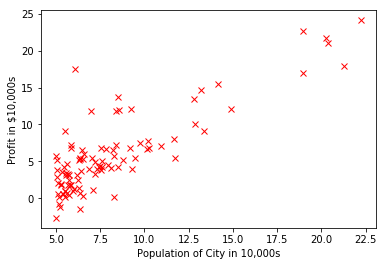

In [6]:
plt.plot(x, y, 'rx')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

### 4. Calculating the cost function:
\begin{equation*}
 J(\theta_0, \theta_1) = \frac{1}{2m} * \sum_{k=1}^n (X * \theta - y) ^ 2  
\end{equation*}

In [6]:
def computeCost(X, y, theta):
    m = np.size(y)
    return (1/(2 * m)) * np.sum((np.dot(X, theta) - y) **2) 

In [7]:
# Testing the cost function with theta([0, 0])
computeCost(X, y, theta)

32.072733877455676

In [8]:
# Testing the cost function with theta([-1, 2])
computeCost(X, y, [-1,2])

54.24245508201238

### 5. Gradient-Descent:
Implementing gradient descent algorithm for finding the minimum of cost function.
\begin{equation*}
\delta  =  \frac{1}{m} * \sum_{k=1}^n (X * \theta - y ) * X ^ i
\end{equation*}

In [9]:
def gradientDescent(X, y, theta, alpha, iterations):
    m = np.size(y)
    j_history = np.zeros(iterations)
    theta_history= np.zeros((iterations,2))
    
    for x in range(iterations): 
        delta = (1/m) * (X.T.dot((np.dot(X, theta) - y)))
        theta = theta - (alpha * delta)
        
        j_history[x] = computeCost(X, y, theta);
    print(j_history)
    return theta 

In [10]:
theta = gradientDescent(X, y, theta, alpha, iterations)
theta

[6.73719046 5.93159357 5.90115471 ... 4.48343473 4.48341145 4.48338826]


array([-3.63029144,  1.16636235])

### 6. Plotting the line : 

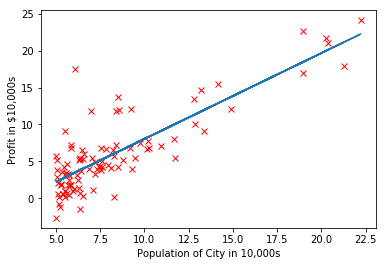

In [11]:
plt.plot(x, y, 'rx')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X[:,1], np.dot(X, theta), '-')

### Predicting new values 

In [12]:
predict1 =np.dot([1, 3.5] ,theta) 
predict1 * 10000

4519.7678677017675

In [13]:
predict2 = np.dot([1, 7] ,theta) 
predict2 * 10000

45342.45012944714

### 7. Plotting the thetas and cost function

In [14]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

In [15]:
J_vals = np.zeros((np.size(theta0_vals), np.size(theta1_vals)))

In [16]:
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = [theta0_vals[i], theta1_vals[j]]
        J_vals[i,j] = computeCost(X, y, t)

In [17]:
J_vals = J_vals.T

Text(0.5,0,'Theta_1')

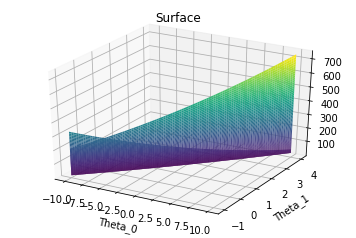

In [18]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals,  rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Surface')
ax.set_xlabel('Theta_0')
ax.set_ylabel('Theta_1')

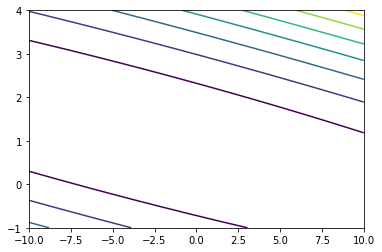

In [19]:
plt.contour(theta0_vals, theta1_vals, J_vals)